In [2]:
#Name=Vipul Anand
#Assignment=Avocardo project
#Batch ID-DS2312

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("C:\\Users\\vipul\\OneDrive\\Documents\\datatrained\\avocado.csv")

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data=data.drop(columns='Unnamed: 0')

In [5]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [6]:
#First transform the data column
data['Date']=pd.to_datetime(data['Date'])

In [8]:
data['year']=data['Date'].dt.year

In [9]:
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day

In [10]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [11]:
#now we can drop the Date column
data=data.drop(columns='Date')
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [12]:
#we do not need to do anything to the year column as it has only 4 value_counts
data['year'].value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

In [13]:
data['month'].value_counts()

month
1     1944
3     1836
2     1728
10    1512
7     1512
5     1512
11    1404
8     1404
4     1404
12    1403
9     1296
6     1294
Name: count, dtype: int64

In [14]:
#let subdivide into summer , winter, spring and autumn
def month(value):
    if value in (3,4,5):
        return 'spring'
    if value in (6,7,8):
        return 'summer'
    if value in (9,10,11):
        return 'autumn'
    if value in (12,1,2):
        return 'winter'

In [15]:
data['month']=data['month'].apply(month)

In [16]:
data['month'].value_counts()

month
winter    5075
spring    4752
autumn    4212
summer    4210
Name: count, dtype: int64

In [17]:
data['day'].value_counts()

day
4     756
11    756
18    755
25    755
1     648
26    648
5     648
12    648
3     648
8     648
15    648
22    648
24    648
17    648
10    648
19    648
7     540
14    540
21    540
28    540
27    540
20    540
29    540
13    540
6     539
2     432
9     432
23    432
30    432
31    432
16    432
Name: count, dtype: int64

In [18]:
#we can divide the day into start , end and the middle of them month
def day(value):
    if value in list(range(1,11)):
        return 'start of month'
    if value in list(range(11,21)):
        return 'middle of month'
    if value in list(range(21,32)):
        return 'end of month'

In [19]:
data['day']=data['day'].apply(day)

In [20]:
data['day'].value_counts()

day
end of month       6155
middle of month    6155
start of month     5939
Name: count, dtype: int64

In [21]:
#now let us encode the columns also
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
data['day']=lab_enc.fit_transform(data['day'])

In [21]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,winter,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,winter,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,winter,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,winter,2
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,autumn,0


In [22]:
df=pd.get_dummies(data['year'])

In [23]:
data=data.join(df)

In [24]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,2015,2016,2017,2018
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,winter,0,True,False,False,False
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,winter,1,True,False,False,False
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,winter,1,True,False,False,False
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,winter,2,True,False,False,False
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,autumn,0,True,False,False,False


In [25]:
data['month']=lab_enc.fit_transform(data['month'])

In [26]:
data['month'].value_counts()

month
3    5075
1    4752
0    4212
2    4210
Name: count, dtype: int64

In [27]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,2015,2016,2017,2018
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,3,0,True,False,False,False
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,3,1,True,False,False,False
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,3,1,True,False,False,False
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,3,2,True,False,False,False
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0,0,True,False,False,False


In [28]:
#let us transform the 
def year(value):
    if value==True:
        return 1
    else:
        return 0

In [29]:
data[2015]=data[2015].apply(year)

In [30]:
data[2016]=data[2016].apply(year)
data[2017]=data[2017].apply(year)
data[2018]=data[2018].apply(year)

In [32]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day,2015,2016,2017,2018
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,3,0,1,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,3,1,1,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,3,1,1,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,3,2,1,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0,0,1,0,0,0


In [33]:
data[2015].value_counts()

2015
0    12634
1     5615
Name: count, dtype: int64

In [34]:
data[2016].value_counts()

2016
0    12633
1     5616
Name: count, dtype: int64

In [35]:
data[2017].value_counts()

2017
0    12527
1     5722
Name: count, dtype: int64

In [36]:
data[2018].value_counts()

2018
0    16953
1     1296
Name: count, dtype: int64

In [37]:
data=data.drop(columns='year')

In [38]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,3,0,1,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,3,1,1,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,3,1,1,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,3,2,1,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,0,0,1,0,0,0


In [39]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,3,0,1,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,3,1,1,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,3,1,1,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,3,2,1,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,0,0,1,0,0,0


In [40]:
#Now the type column
data['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [41]:
data['type']=lab_enc.fit_transform(data['type'])

In [42]:
data['type'].value_counts()

type
0    9126
1    9123
Name: count, dtype: int64

In [43]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,Albany,3,0,1,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,Albany,3,1,1,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,Albany,3,1,1,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,Albany,3,2,1,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,Albany,0,0,1,0,0,0


In [44]:
data['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [45]:
data['region'].value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [46]:
data_r=data # we have defined a new dataframe here by copying the data

In [47]:
region=data['region'].value_counts().index

In [48]:
len(region)

54

In [49]:
#it is clear that we will have to create clusters here we can ont work with these many unique values
region[:6]

Index(['Albany', 'Sacramento', 'Northeast', 'NorthernNewEngland', 'Orlando',
       'Philadelphia'],
      dtype='object', name='region')

In [50]:
def Region(value):
    if value in region[:6]:
        return 'region1'
    if value in region[6:12]:
        return 'region2'
    if value in region[12:18]:
        return 'region3'
    if value in region[18:24]:
        return 'region4'
    if value in region[24:30]:
        return 'region5'
    if value in region[30:36]:
        return 'region6'
    if value in region[36:42]:
        return 'region7'
    if value in region[42:48]:
        return 'region8'
    if value in region[48:54]:
        return 'region9'

In [51]:
data['region']=data['region'].apply(Region)

In [52]:
data['region']=lab_enc.fit_transform(data['region'])

In [53]:
data['region'].value_counts()

region
0    2028
2    2028
5    2028
6    2028
7    2028
4    2028
1    2028
3    2028
8    2025
Name: count, dtype: int64

In [54]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,3,0,1,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,3,1,1,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,3,1,1,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,3,2,1,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,0,1,0,0,0


In [55]:
#Now let us proceed to the other steps
data.isna().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
month           0
day             0
2015            0
2016            0
2017            0
2018            0
dtype: int64

<Axes: >

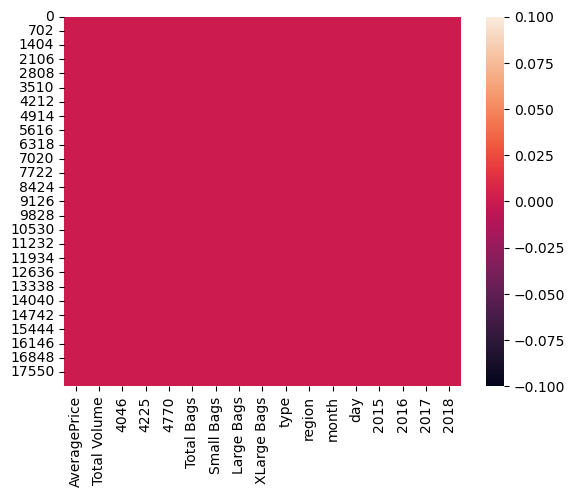

In [56]:
sns.heatmap(data.isna())

In [ ]:
#no nulls in the data at all

In [57]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,3,0,1,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,3,1,1,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,3,1,1,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,3,2,1,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0,0,1,0,0,0


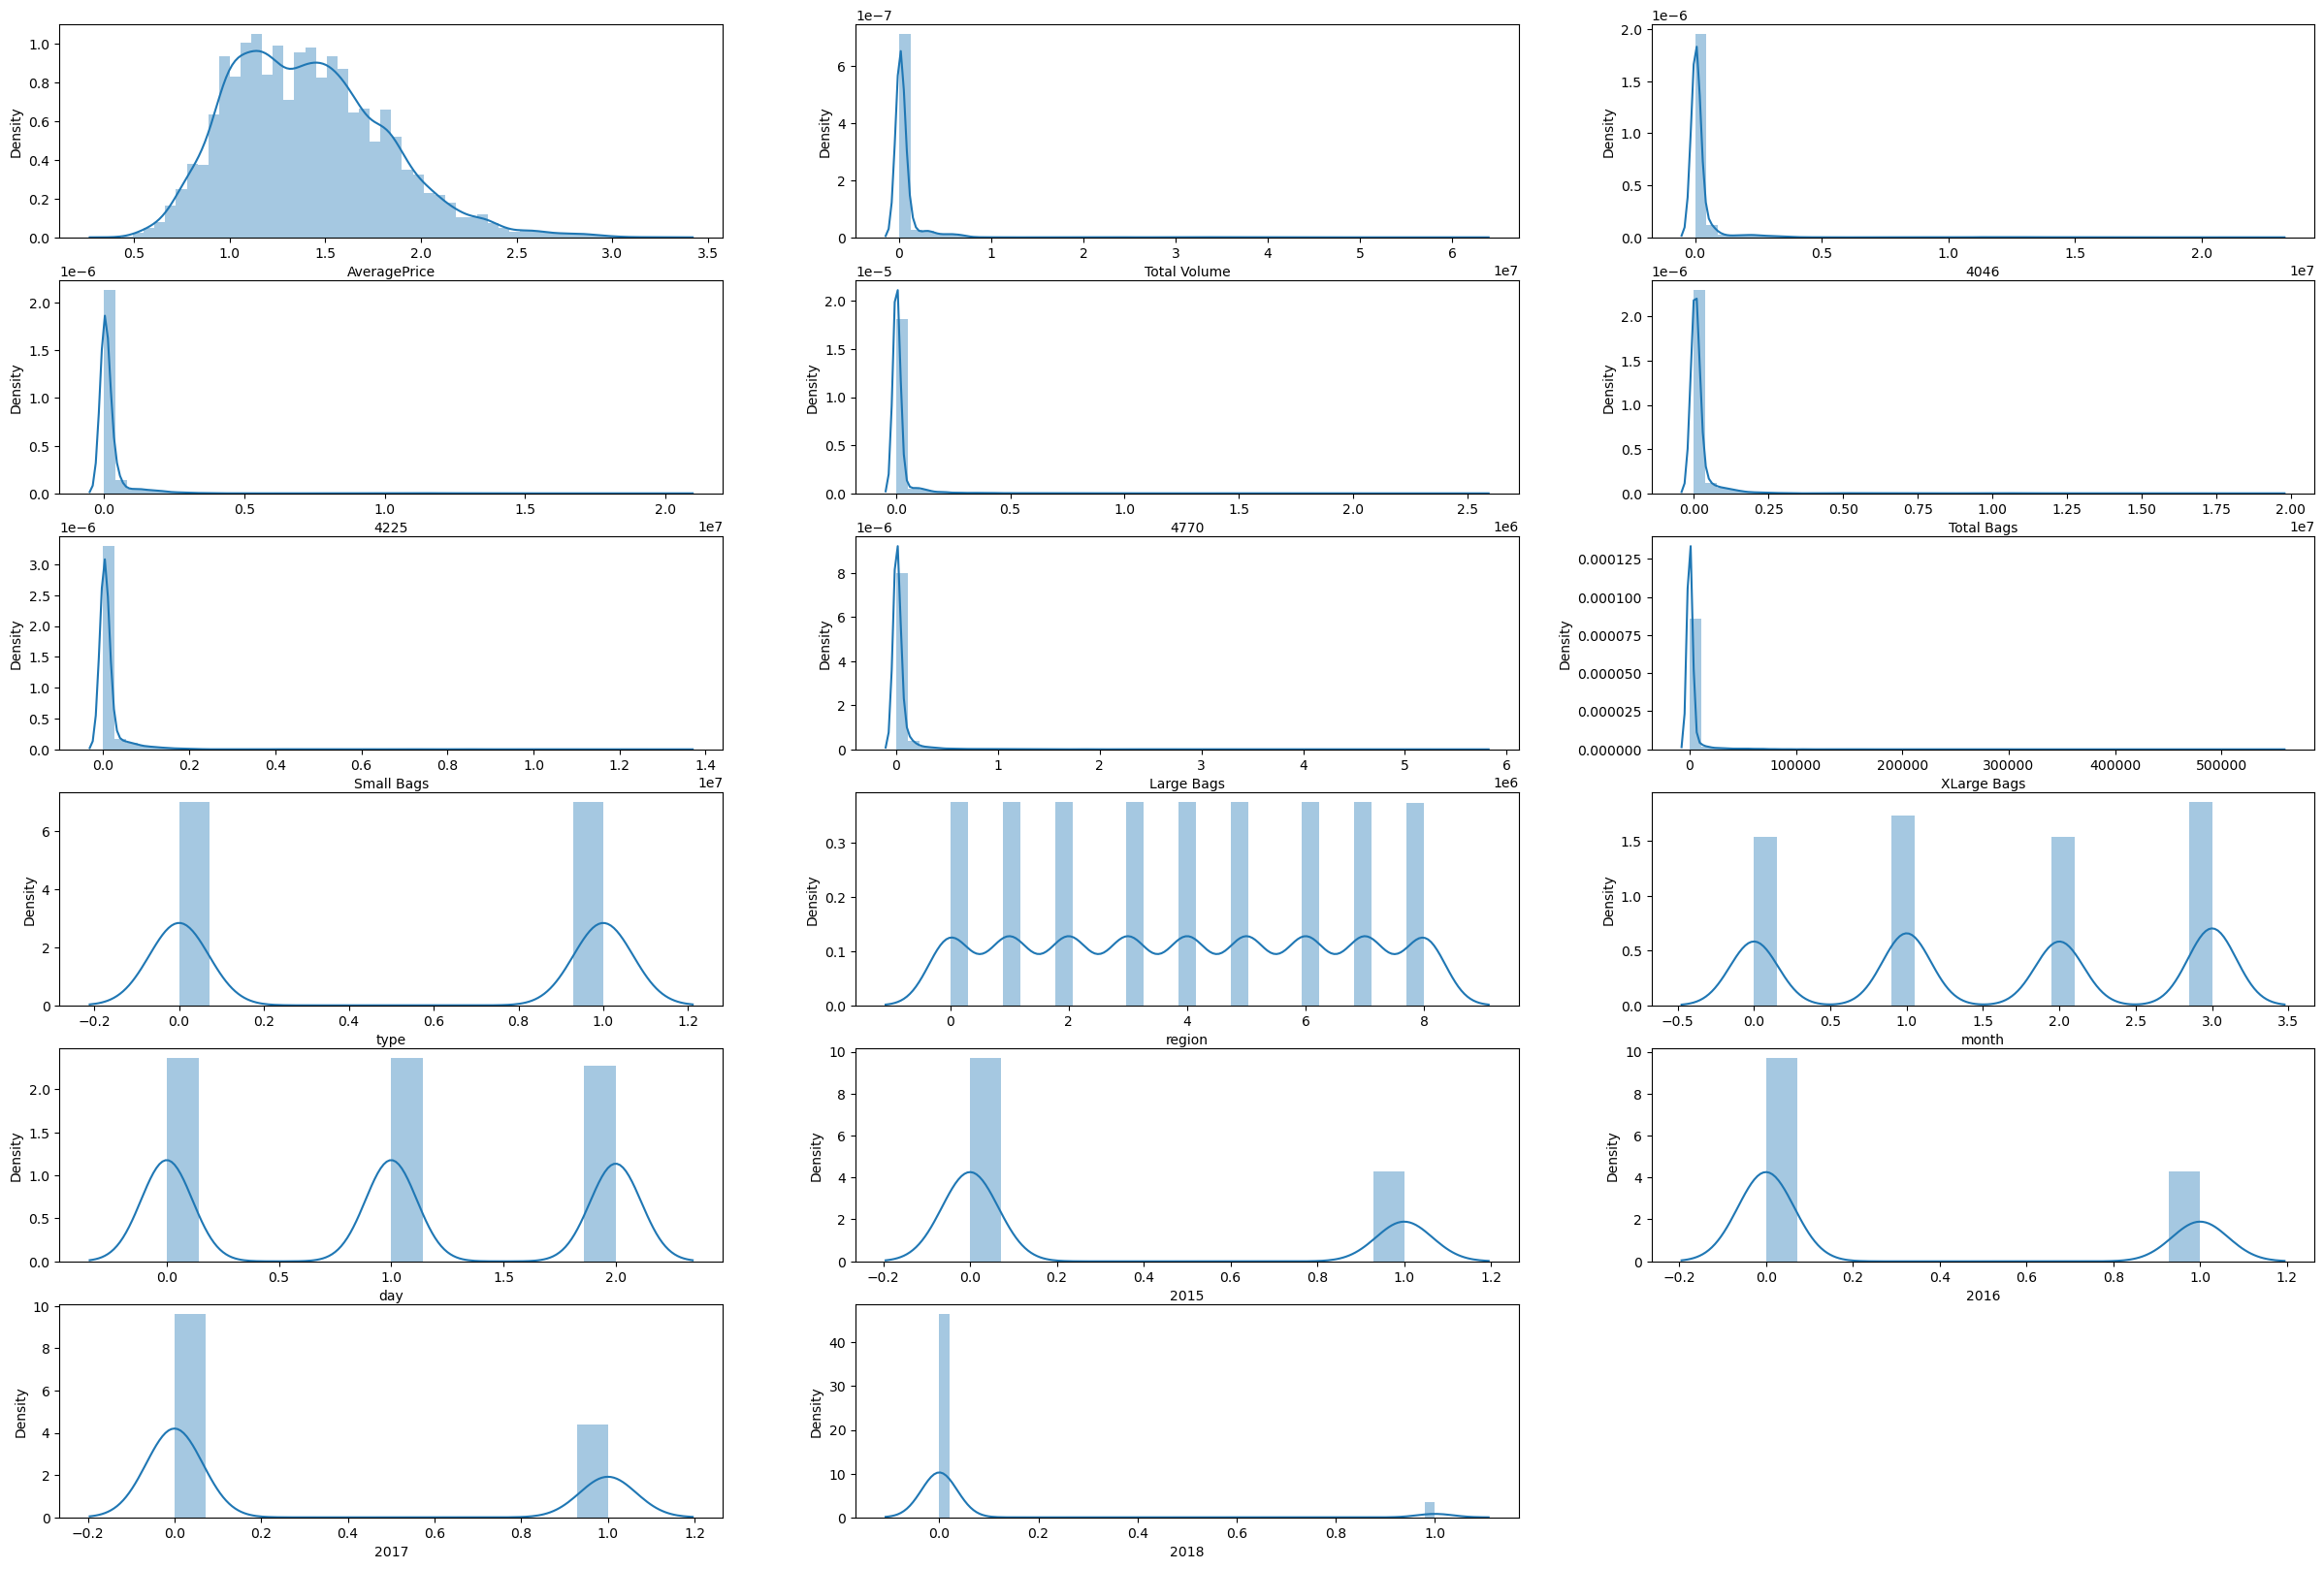

In [59]:
plt.figure(figsize=(30,20))
plotnumber=1
for i in data:
    plt.subplot(6,3,plotnumber)
    sns.distplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

In [58]:
np.where(data['4225']<0)

(array([], dtype=int64),)

In [59]:
np.where(data['Total Bags']<0)

(array([], dtype=int64),)

In [60]:
np.where(data['Total Volume']<0)

(array([], dtype=int64),)

In [61]:
np.where(data['4046']<0)

(array([], dtype=int64),)

In [62]:
np.where(data['4770']<0)

(array([], dtype=int64),)

In [63]:
np.where(data['Small Bags']<0)

(array([], dtype=int64),)

In [64]:
np.where(data['Large Bags']<0)

(array([], dtype=int64),)

In [65]:
np.where(data['XLarge Bags']<0)

(array([], dtype=int64),)

In [134]:
#So the data looks fine we we have to remove the outliers now

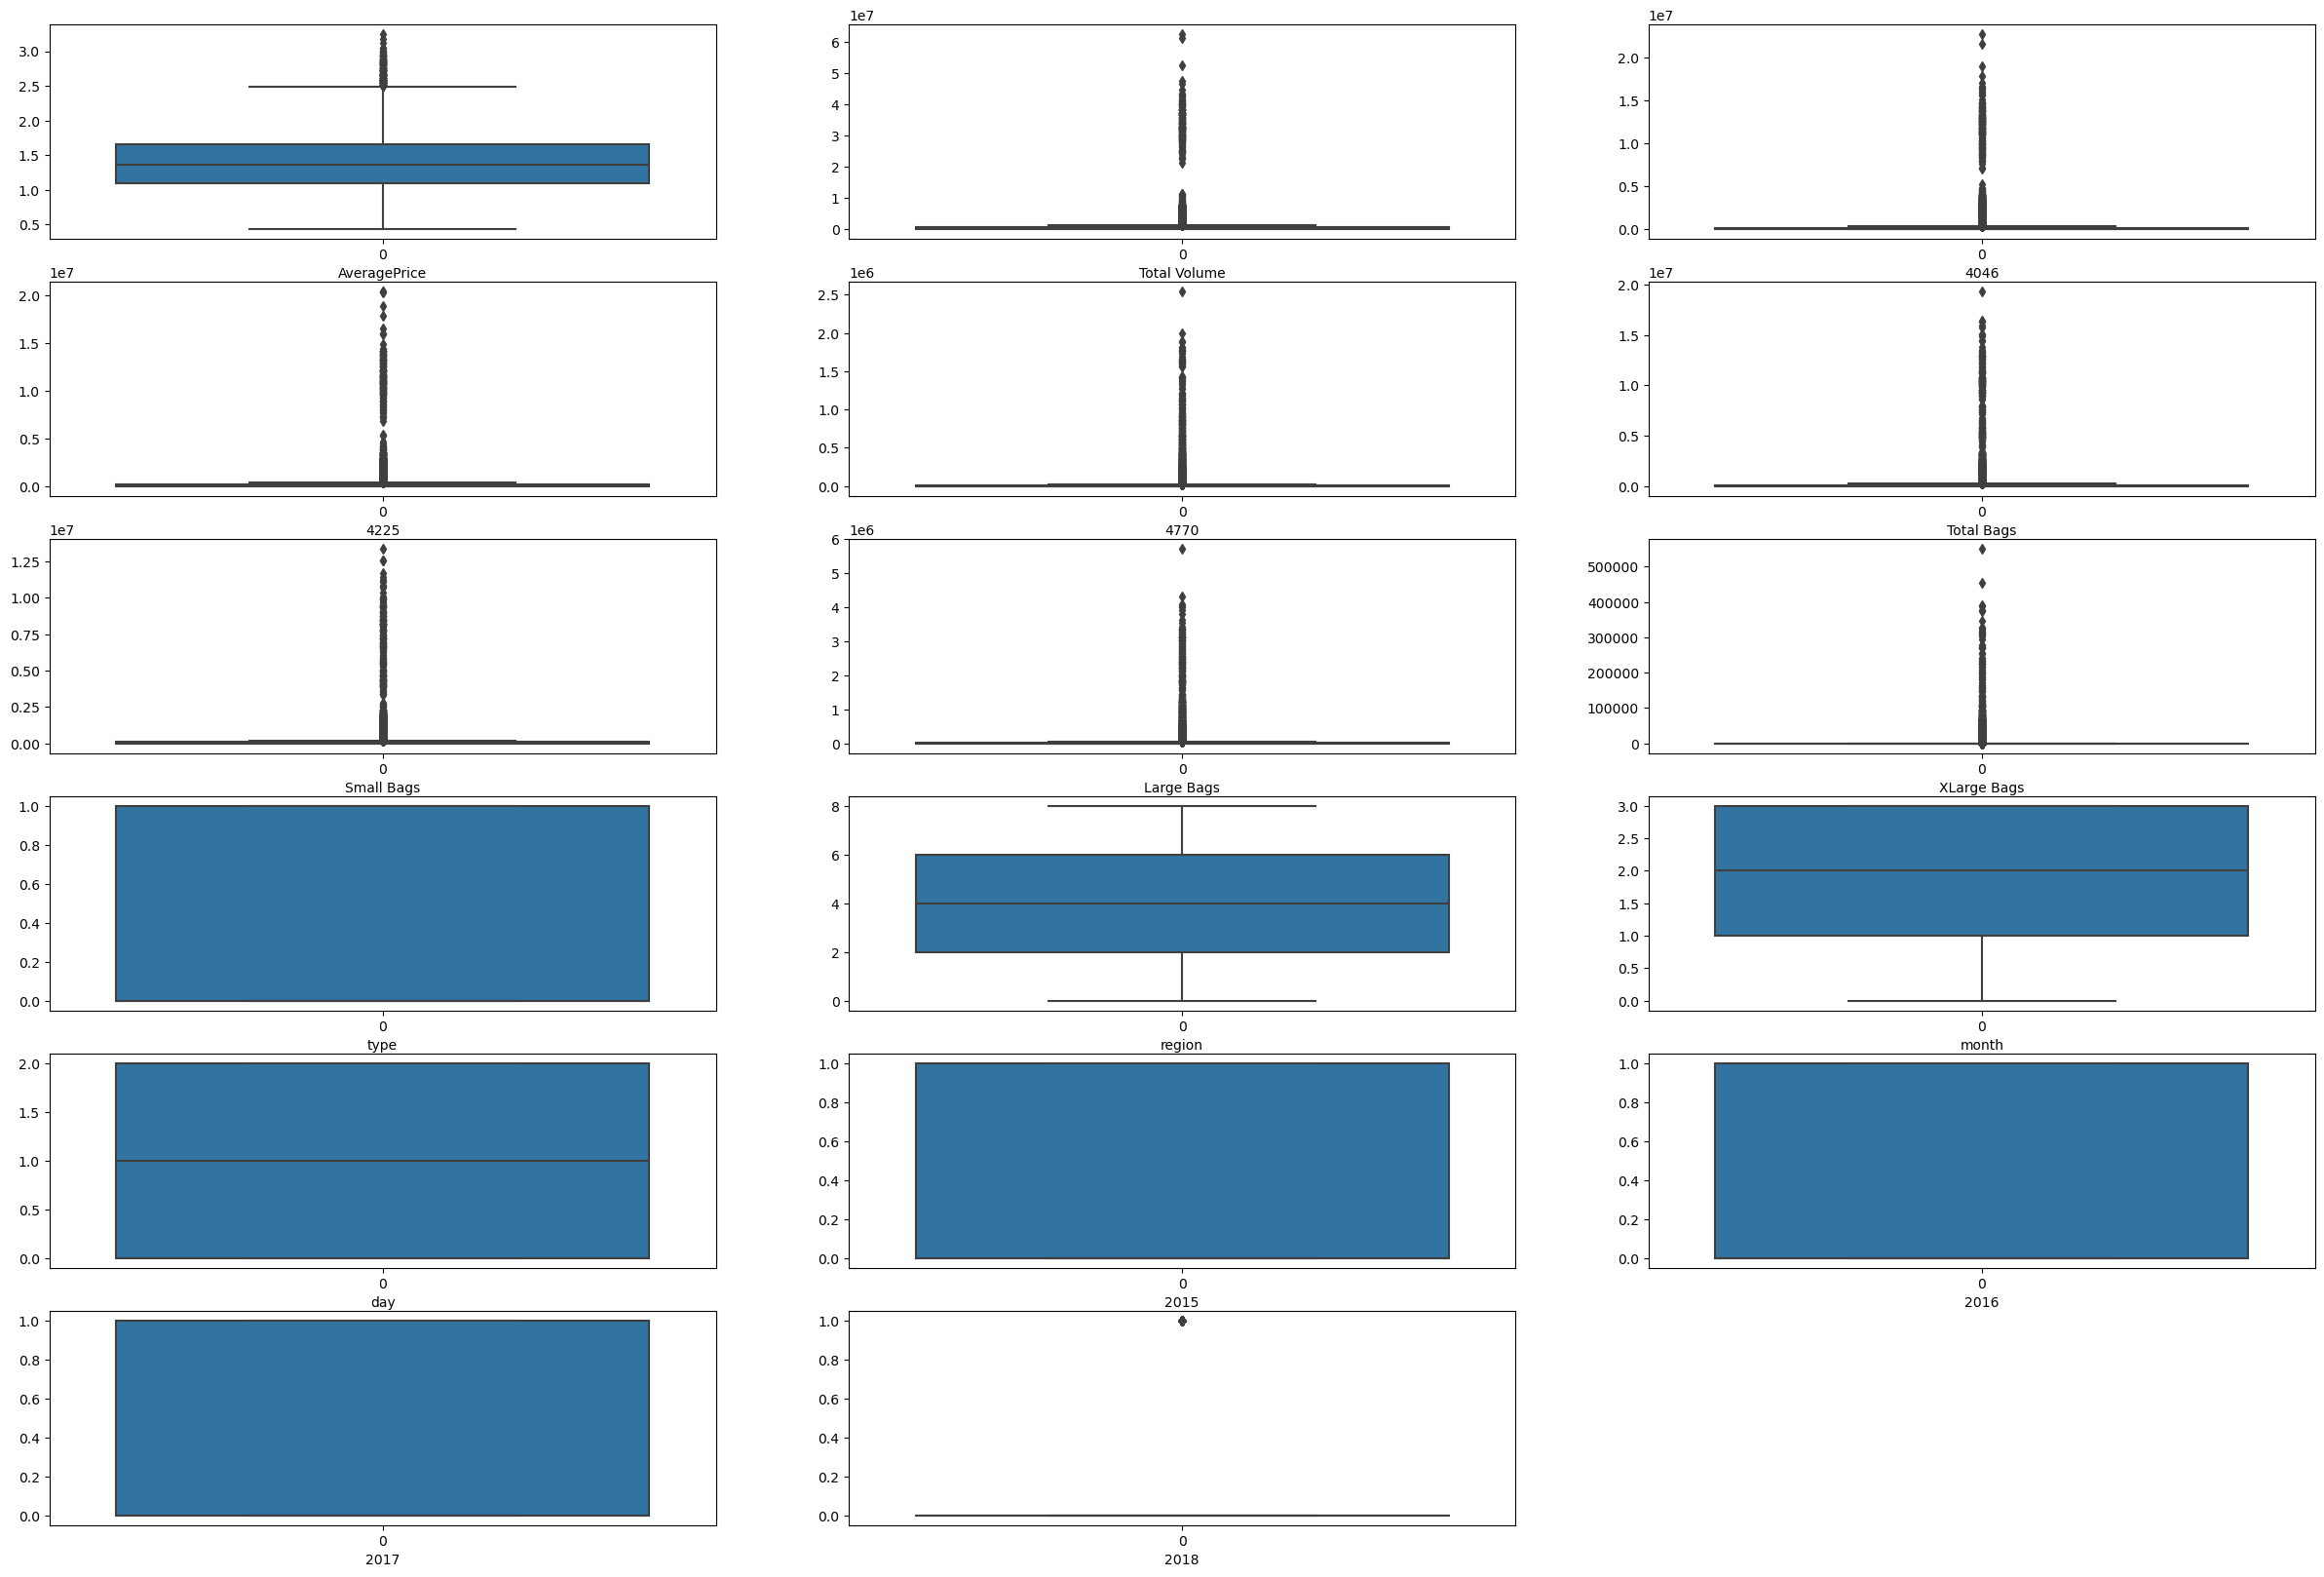

In [68]:
plt.figure(figsize=(30,20))
plotnumber=1
for i in data:
    plt.subplot(6,3,plotnumber)
    sns.boxplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

In [139]:
#There are a lot of outliers and removing them we will loose a lot of information rather than this we can just use the transformation methods

In [66]:
data.columns

Index(['AveragePrice', 'Total Volume',         '4046',         '4225',
               '4770',   'Total Bags',   'Small Bags',   'Large Bags',
        'XLarge Bags',         'type',       'region',        'month',
                'day',           2015,           2016,           2017,
                 2018],
      dtype='object')

In [67]:
column=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']

In [68]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') #our data is strictly postive so we will use box-cox

In [69]:
corr=data.corr()

<Axes: >

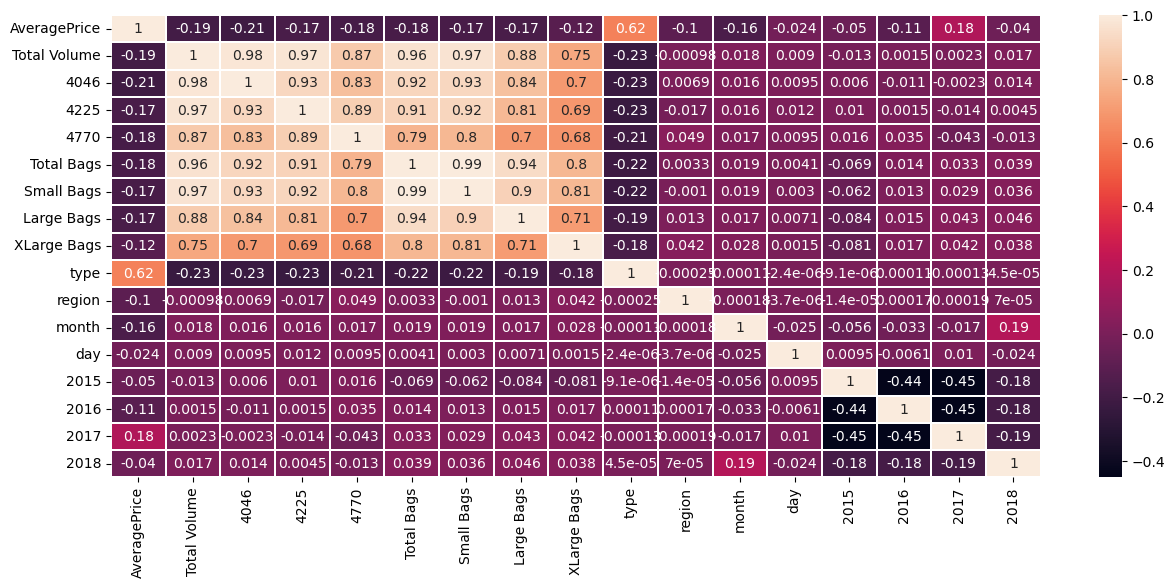

In [70]:
#The heatmap to see the coorelation
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,linewidths=0.1)

In [71]:
transform=pt.fit_transform(data[column])

In [72]:
transform=pd.DataFrame(transform,columns=column)

In [74]:
transform

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849
1,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849
2,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849
3,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849
4,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849
...,...,...,...,...,...,...,...,...
18244,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849
18245,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849
18246,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849
18247,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849


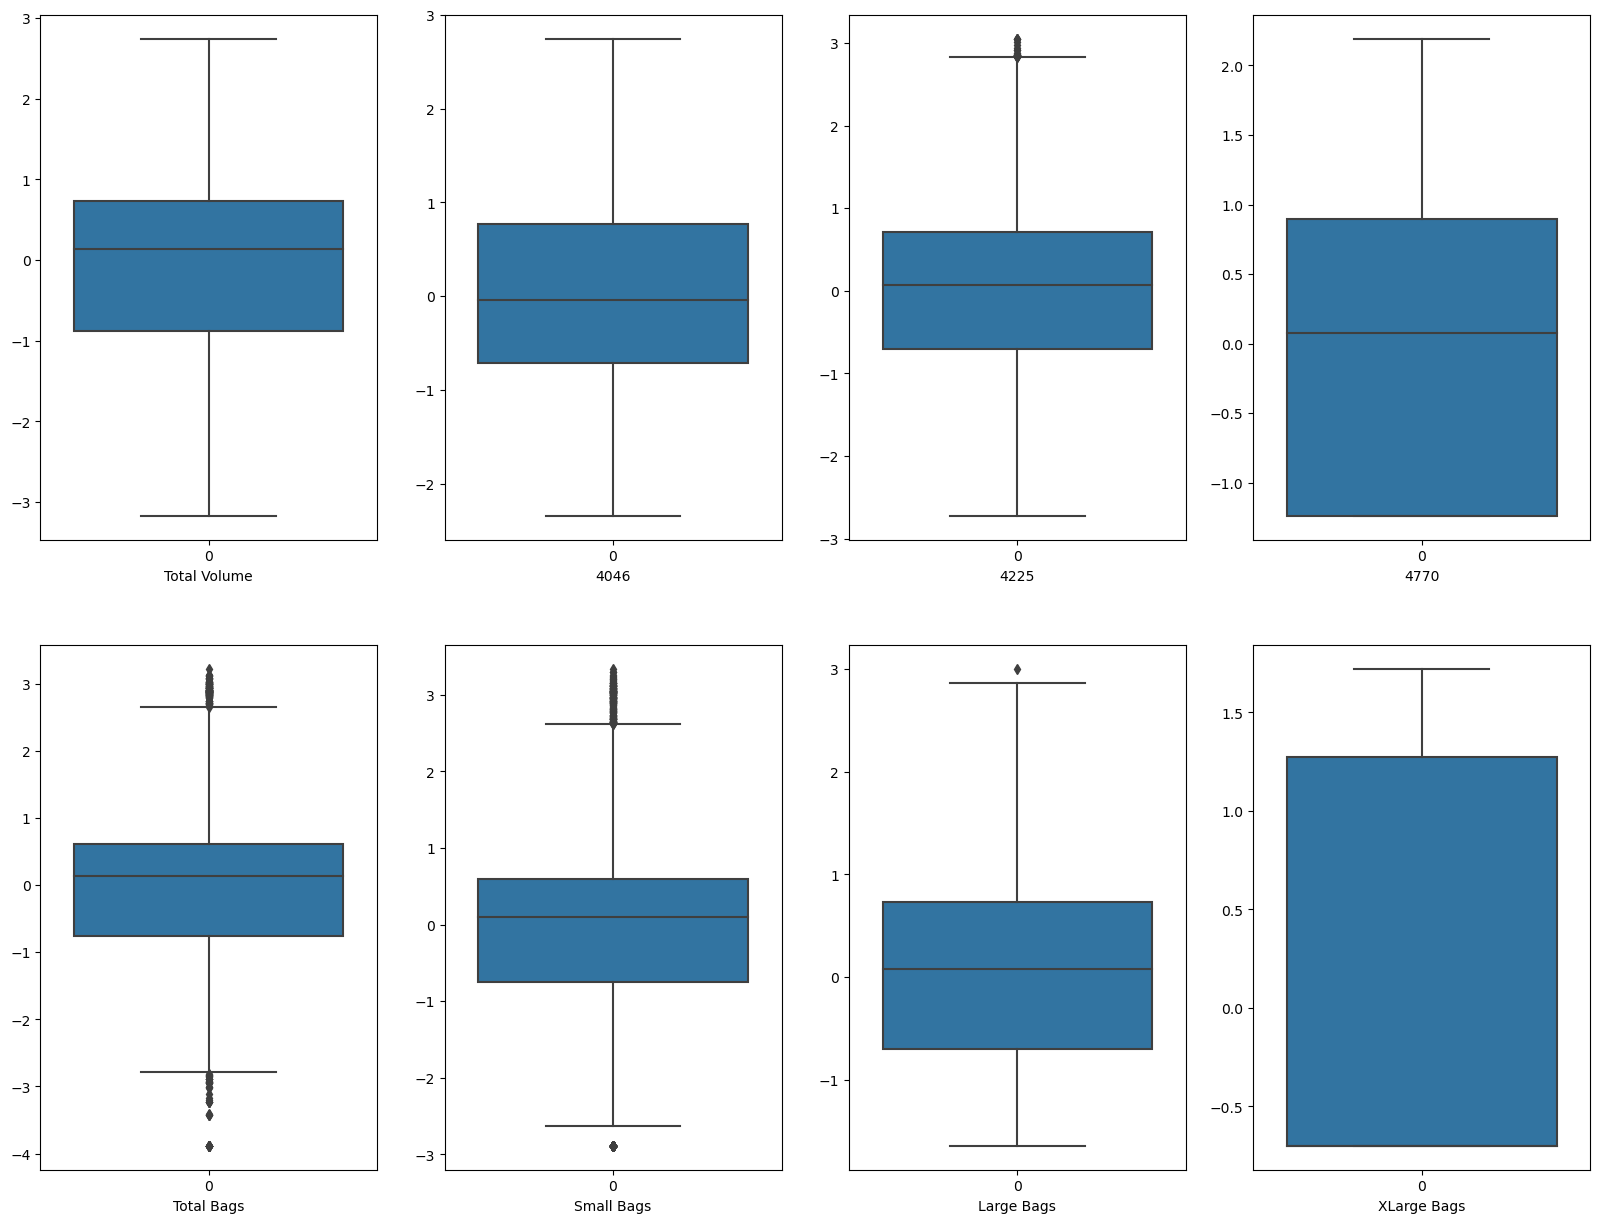

In [66]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in transform:
    plt.subplot(2,4,plotnumber)
    sns.boxplot(transform[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

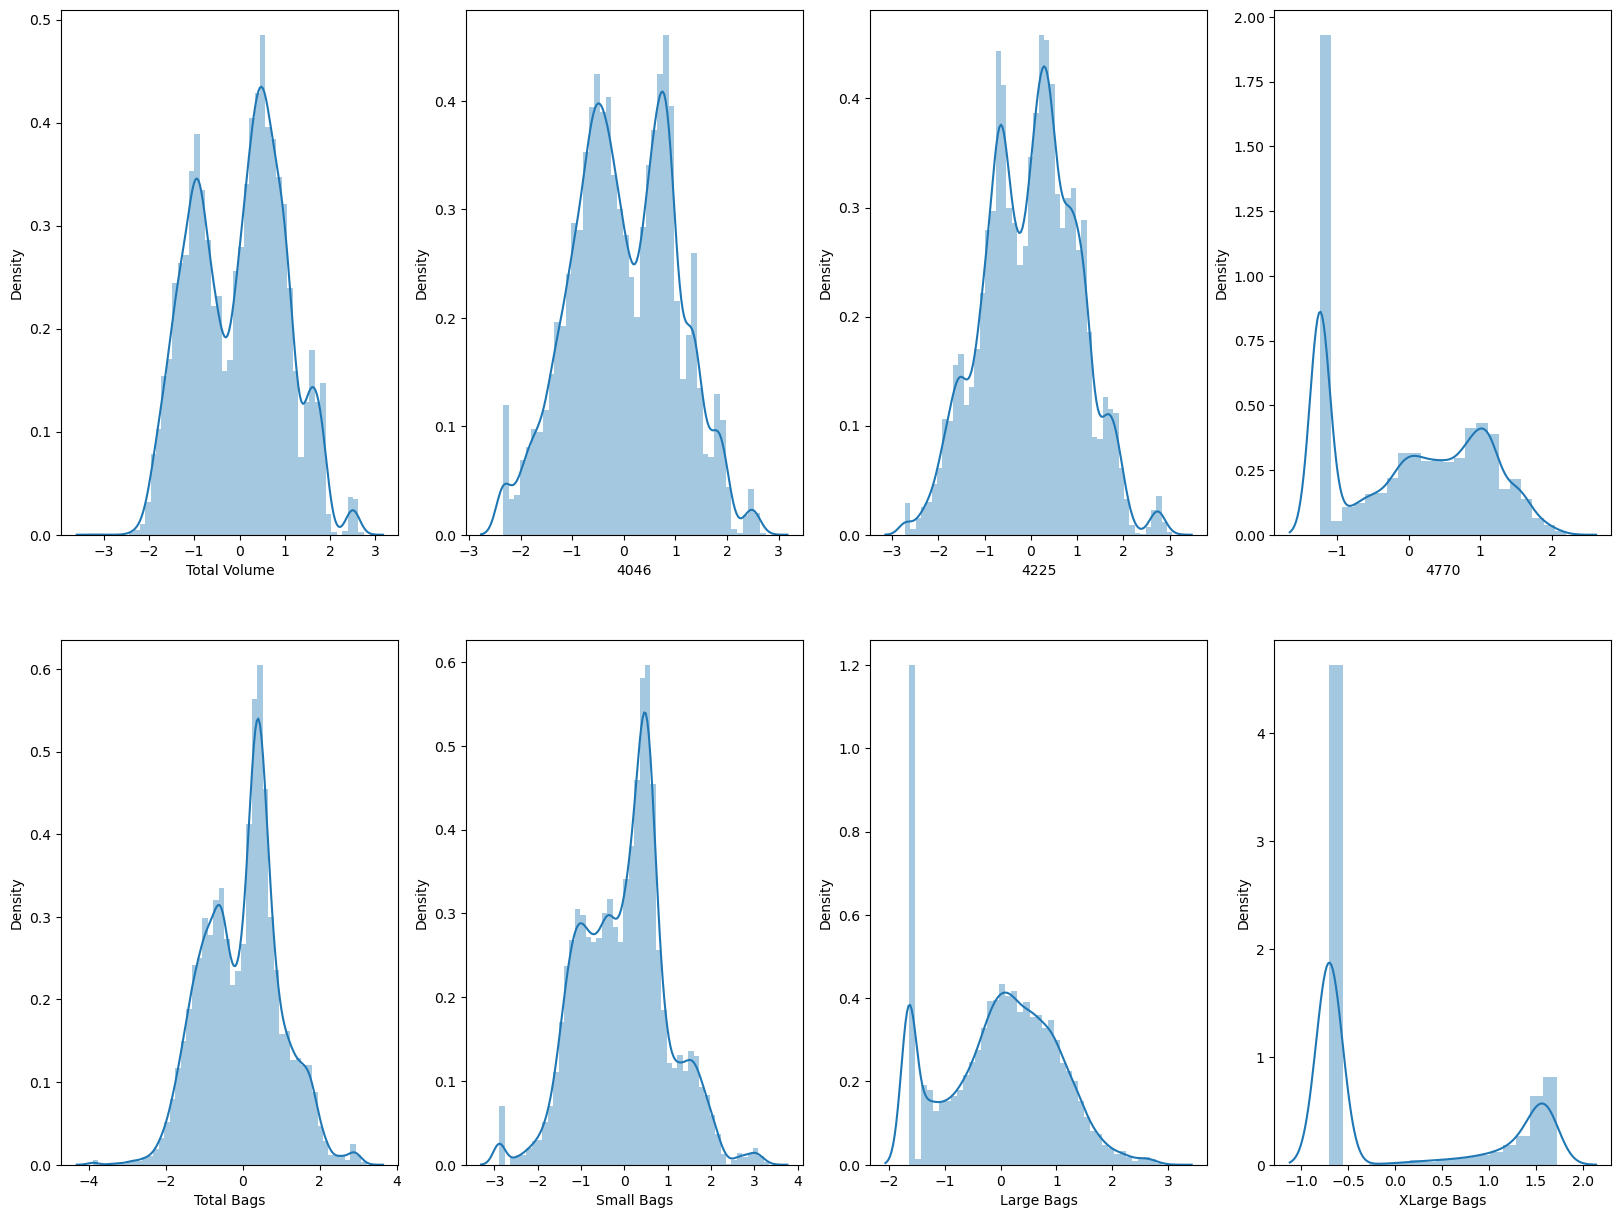

In [81]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in transform:
    plt.subplot(2,4,plotnumber)
    sns.distplot(transform[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

In [75]:
#now the distribution is close to normal
data[column]=transform

In [76]:
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,0,3,0,1,0,0,0
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,0,3,1,1,0,0,0
2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,0,3,1,1,0,0,0
3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0,0,3,2,1,0,0,0
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0,0,0,0,1,0,0,0


In [77]:
#now let us use the zscore to remove the left outliers
from scipy.stats import zscore

In [78]:
np.abs(zscore(data[column]))

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.086605,0.658619,0.307313,0.247250,0.524004,0.340627,0.773351,0.699849
1,0.155746,0.776870,0.231647,0.201041,0.485890,0.306425,0.763435,0.699849
2,0.179327,0.731947,0.579503,0.007072,0.552018,0.366303,0.750820,0.699849
3,0.003876,0.634200,0.415100,0.148322,0.695449,0.496853,0.691865,0.699849
4,0.187640,0.685293,0.224806,0.137918,0.669157,0.477201,0.600975,0.699849
...,...,...,...,...,...,...,...,...
18244,0.674587,0.467366,0.919470,1.238310,0.334466,0.178839,0.410859,0.699849
18245,0.767550,0.619883,0.665372,1.238310,0.496897,0.325977,0.481465,0.699849
18246,0.771505,0.619831,0.772496,0.401546,0.490952,0.308728,0.943486,0.699849
18247,0.698077,0.550282,0.710543,0.401246,0.424252,0.248932,0.908510,0.699849


In [79]:
index=np.where(np.abs(zscore(data[column]))>3)

In [80]:
len(index[0])

123

In [88]:
#so there are 123 column and we can afford to drop it also

In [81]:
data.drop(index=index[0],inplace=True)
data.reset_index(drop=True)
data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,0,3,0,1,0,0,0
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,0,3,1,1,0,0,0
2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,0,3,1,1,0,0,0
3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0,0,3,2,1,0,0,0
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0,0,0,0,1,0,0,0


In [82]:
data

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
0,1.33,-0.086605,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,0,3,0,1,0,0,0
1,1.35,-0.155746,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,0,3,1,1,0,0,0
2,0.93,0.179327,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,0,3,1,1,0,0,0
3,1.08,0.003876,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0,0,3,2,1,0,0,0
4,1.28,-0.187640,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.674587,-0.467366,-0.919470,-1.238310,-0.334466,-0.178839,-0.410859,-0.699849,1,8,3,2,0,0,0,1
18245,1.71,-0.767550,-0.619883,-0.665372,-1.238310,-0.496897,-0.325977,-0.481465,-0.699849,1,8,3,0,0,0,0,1
18246,1.87,-0.771505,-0.619831,-0.772496,0.401546,-0.490952,-0.308728,-0.943486,-0.699849,1,8,3,0,0,0,0,1
18247,1.93,-0.698077,-0.550282,-0.710543,0.401246,-0.424252,-0.248932,-0.908510,-0.699849,1,8,3,1,0,0,0,1


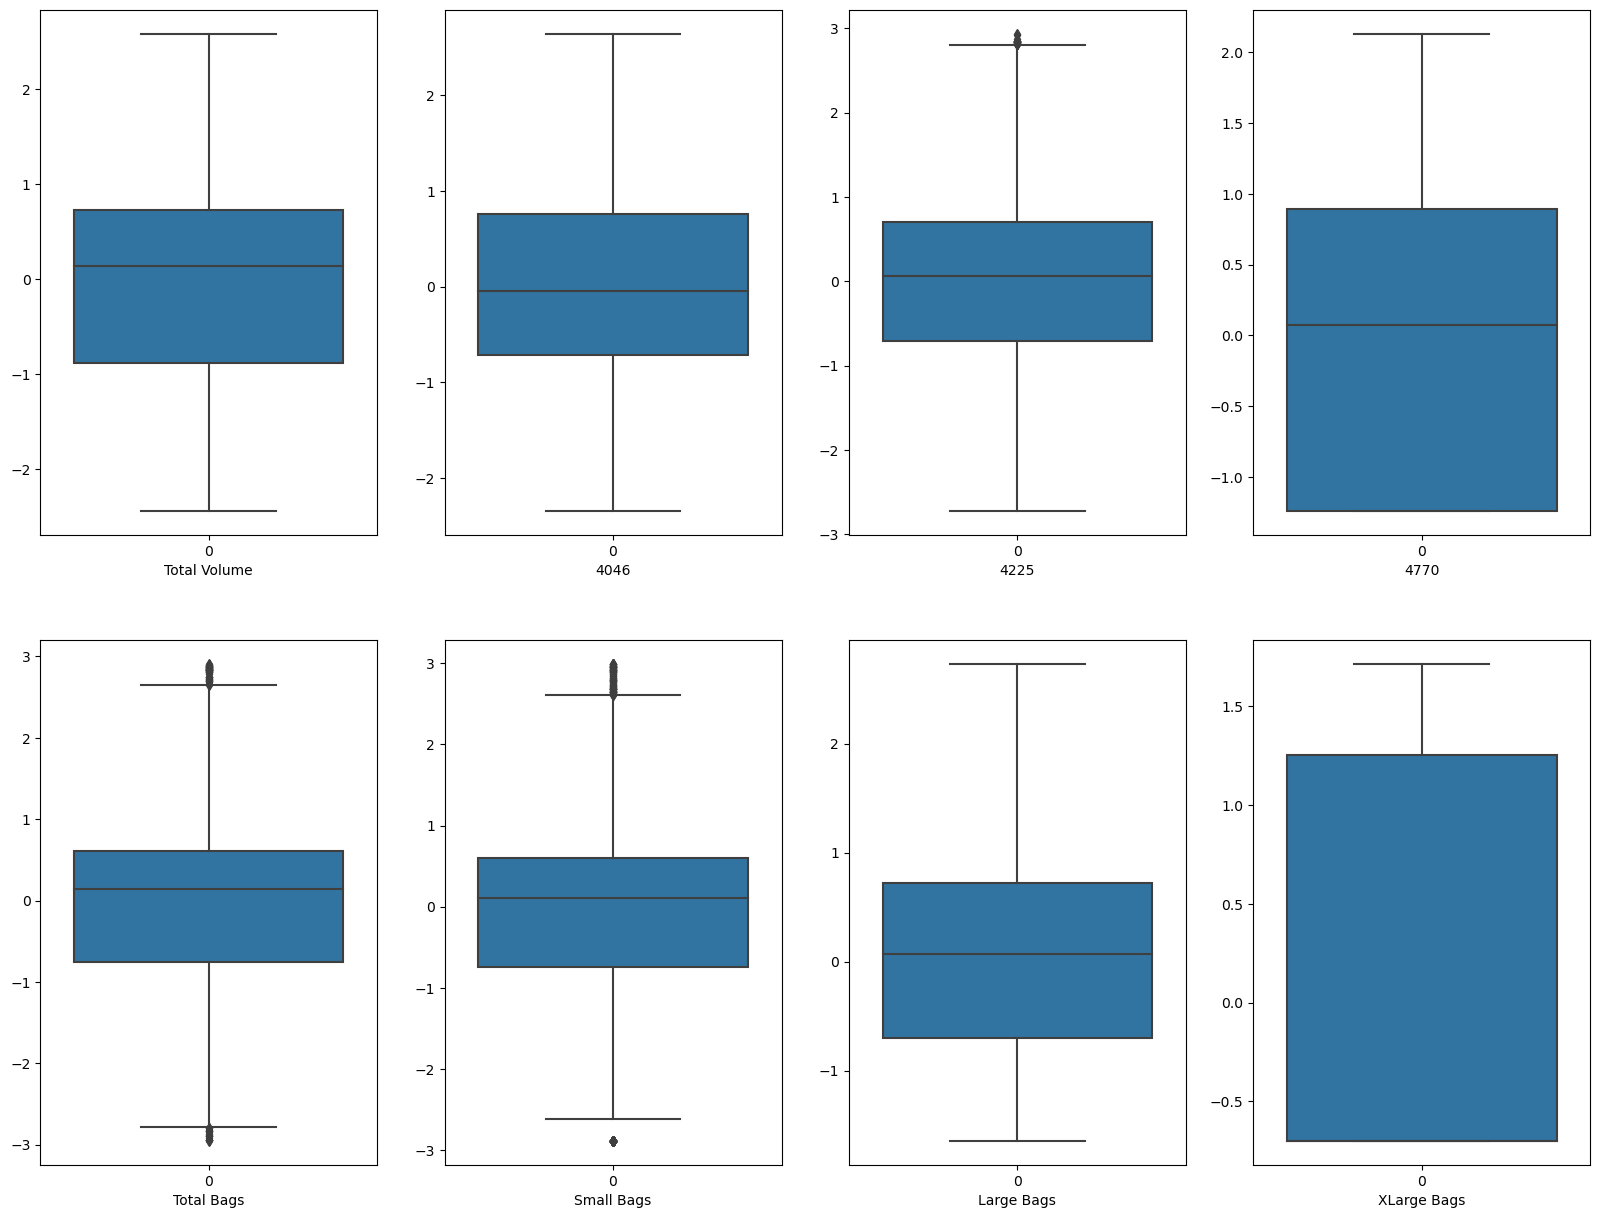

In [83]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in column:
    plt.subplot(2,4,plotnumber)
    sns.boxplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

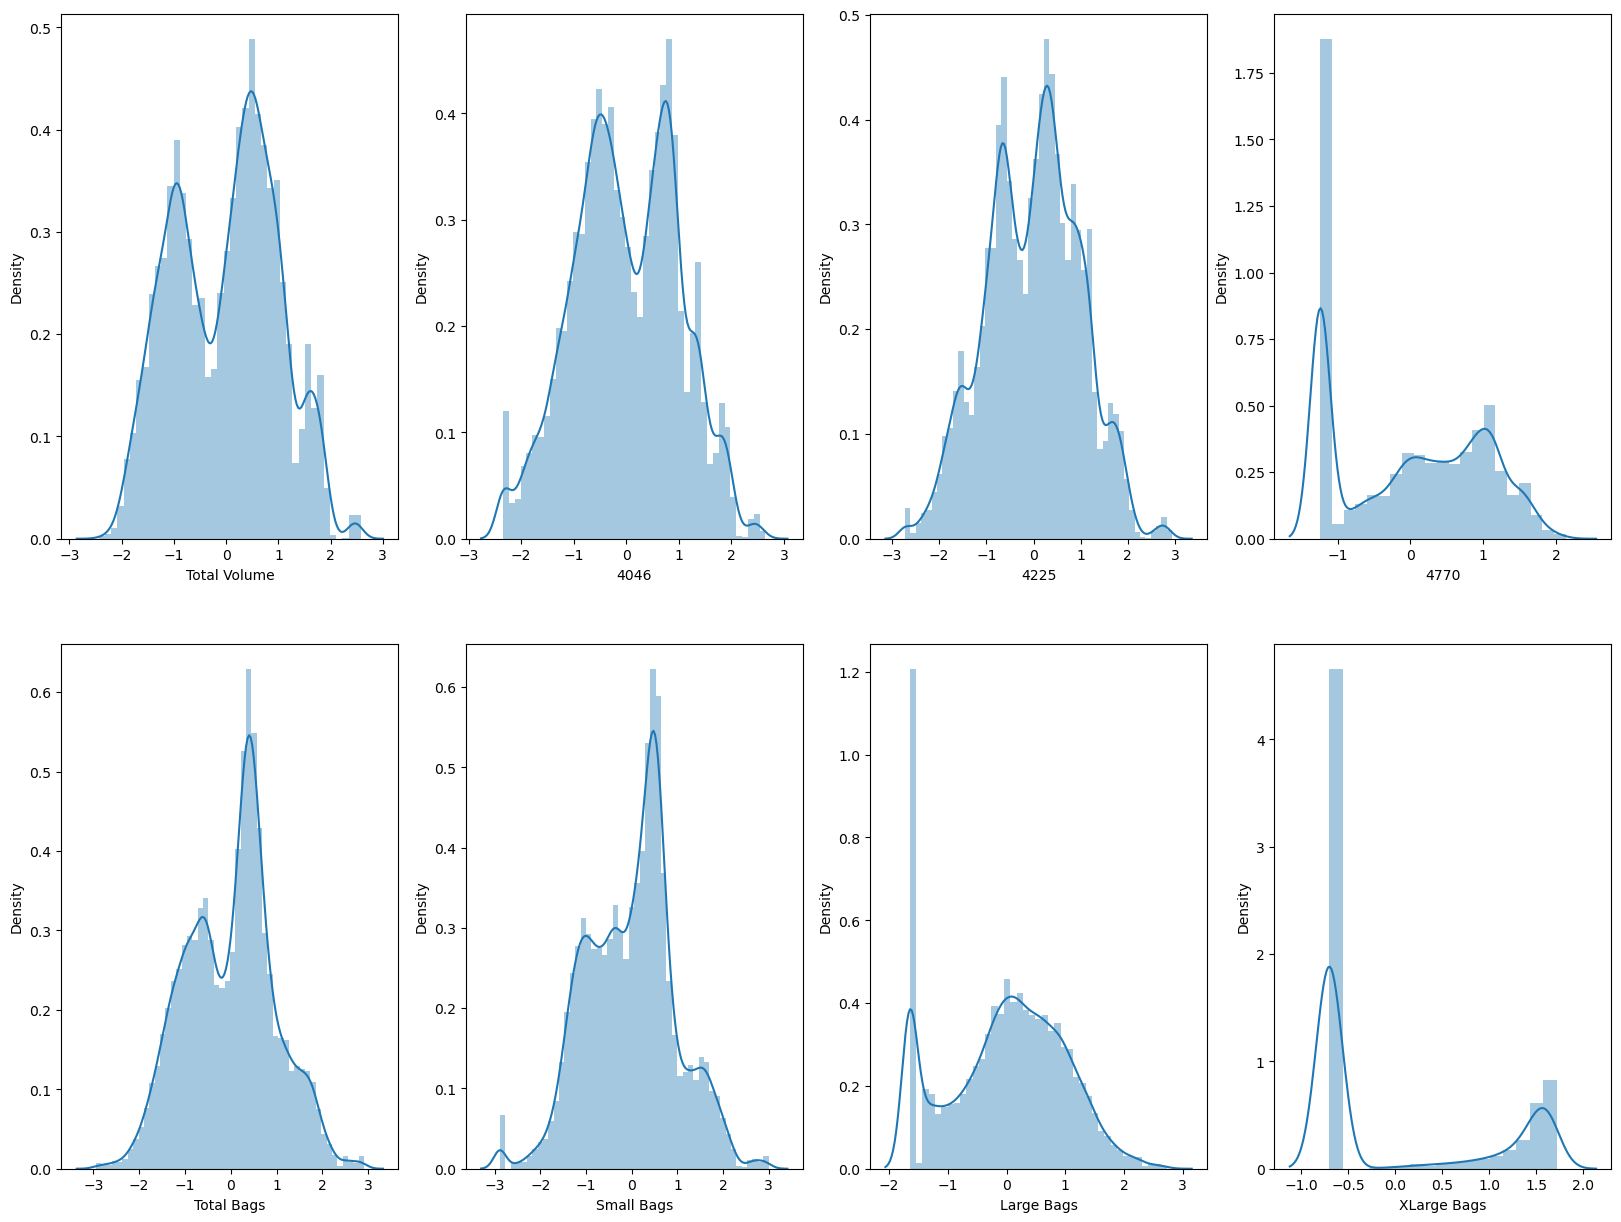

In [84]:
plt.figure(figsize=(20,15))
plotnumber=1
for i in column:
    plt.subplot(2,4,plotnumber)
    sns.distplot(data[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

In [175]:
#Now the distribution is more close to normal

In [85]:
data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
count,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000,18151.000000
mean,1.406417,-0.007980,-0.008719,-0.009515,-0.005516,-0.005274,-0.007187,-0.007176,-0.005240,0.500964,4.001543,1.555066,0.988375,0.307752,0.307917,0.313592,0.070740
std,0.402152,0.989267,0.990303,0.987913,0.994280,0.975523,0.978569,0.987415,0.996842,0.500013,2.587467,1.125480,0.813947,0.461576,0.461645,0.463965,0.256397
min,0.440000,-2.443870,-2.343573,-2.725056,-1.238310,-2.952541,-2.888086,-1.645675,-0.699849,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.100000,-0.881142,-0.714144,-0.709488,-1.238310,-0.750898,-0.744225,-0.701390,-0.699849,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.370000,0.134782,-0.050135,0.068067,0.073256,0.139776,0.101387,0.073202,-0.699849,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.660000,0.729815,0.761393,0.697640,0.893191,0.607016,0.596307,0.722392,1.256105,1.000000,6.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.000000
max,3.250000,2.586595,2.644951,2.939028,2.131184,2.910883,2.997046,2.734898,1.716436,1.000000,8.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
#now he relation part
corr=data.corr()

<Axes: >

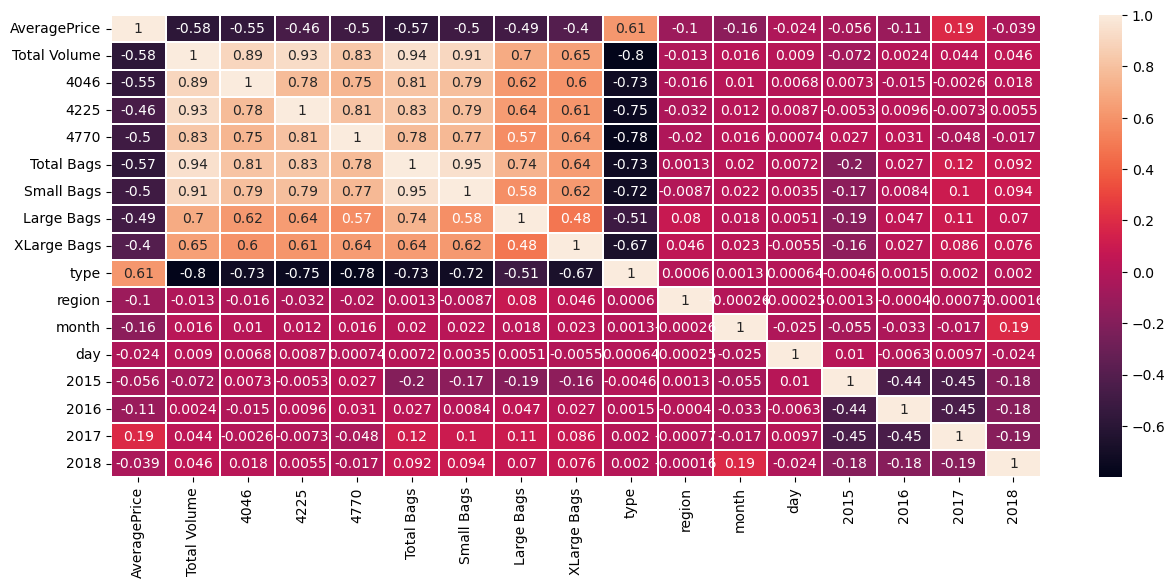

In [87]:
#The heatmap to see the coorelation
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,linewidths=0.1)

Text(0, 0.5, 'Total volumne')

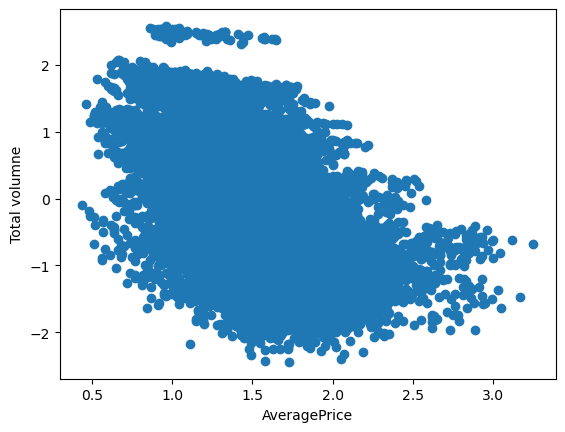

In [88]:
#the total volumne has a very high relation with many column 
#let us now see it's relation with the label or else we will drop this
plt.scatter(x='AveragePrice',y='Total Volume',data=data)
plt.xlabel('AveragePrice')
plt.ylabel('Total volumne')

Text(0, 0.5, 'Total volumne')

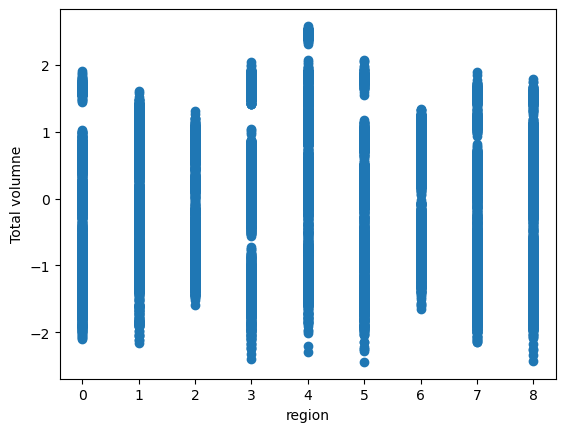

In [89]:
plt.scatter(x='region',y='Total Volume',data=data)
plt.xlabel('region')
plt.ylabel('Total volumne')

In [90]:
#it is showing negative relation with the aveage price and no relation with the total volumne so we will drop thos
data=data.drop(columns='Total Volume')

In [91]:
corr['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.614617
2017            0.186326
day            -0.024259
2018           -0.038558
2015           -0.055613
region         -0.099984
2016           -0.110243
month          -0.161350
XLarge Bags    -0.402168
4225           -0.459168
Large Bags     -0.487033
Small Bags     -0.500743
4770           -0.502944
4046           -0.554724
Total Bags     -0.573035
Total Volume   -0.584229
Name: AveragePrice, dtype: float64

In [92]:
corr['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.079606
XLarge Bags     0.046477
Total Bags      0.001347
2015            0.001263
type            0.000595
2018           -0.000164
day            -0.000253
month          -0.000256
2016           -0.000398
2017           -0.000770
Small Bags     -0.008664
Total Volume   -0.013151
4046           -0.015798
4770           -0.020202
4225           -0.032418
AveragePrice   -0.099984
Name: region, dtype: float64

In [93]:
#rest all the mutlicoolinearity we will figure it out with the variance inlfation factor
data.head()

,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
0,1.33,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,0,3,0,1,0,0,0
1,1.35,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,0,3,1,1,0,0,0
2,0.93,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,0,3,1,1,0,0,0
3,1.08,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0,0,3,2,1,0,0,0
4,1.28,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0,0,0,0,1,0,0,0


In [94]:
#first we will do the regression and than the classification
x=data.drop(columns='AveragePrice')
y=data['AveragePrice']

In [95]:
#standardization
from sklearn.preprocessing import StandardScaler

In [96]:
scaler=StandardScaler()

In [97]:
x_scaled=scaler.fit_transform(x.values)

In [98]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)

In [99]:
x_scaled

,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
0,-0.656281,0.320713,-0.243131,-0.531760,-0.340752,-0.775962,-0.696829,-1.001930,-1.546552,1.283873,-1.214333,1.499791,-0.667018,-0.675913,-0.275908
1,-0.775693,0.244120,-0.196655,-0.492688,-0.305800,-0.765919,-0.696829,-1.001930,-1.546552,1.283873,0.014282,1.499791,-0.667018,-0.675913,-0.275908
2,-0.730329,0.596242,-0.001565,-0.560477,-0.366991,-0.753143,-0.696829,-1.001930,-1.546552,1.283873,0.014282,1.499791,-0.667018,-0.675913,-0.275908
3,-0.631622,0.429822,-0.143631,-0.707511,-0.500404,-0.693436,-0.696829,-1.001930,-1.546552,1.283873,1.242898,1.499791,-0.667018,-0.675913,-0.275908
4,-0.683217,0.237195,-0.133167,-0.680559,-0.480321,-0.601385,-0.696829,-1.001930,-1.546552,-1.381729,-1.214333,1.499791,-0.667018,-0.675913,-0.275908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18146,-0.463151,-0.921114,-1.239919,-0.337461,-0.175416,-0.408840,-0.696829,0.998074,1.545360,1.283873,1.242898,-0.666760,-0.667018,-0.675913,3.624402
18147,-0.617164,-0.663900,-1.239919,-0.503972,-0.325781,-0.480347,-0.696829,0.998074,1.545360,1.283873,-1.214333,-0.666760,-0.667018,-0.675913,3.624402
18148,-0.617112,-0.772338,0.409416,-0.497877,-0.308153,-0.948271,-0.696829,0.998074,1.545360,1.283873,-1.214333,-0.666760,-0.667018,-0.675913,3.624402
18149,-0.546880,-0.709625,0.409114,-0.429502,-0.247046,-0.912848,-0.696829,0.998074,1.545360,1.283873,0.014282,-0.666760,-0.667018,-0.675913,3.624402


In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
for i in range(15):
    print(x_scaled.columns[i])
    print('  ')
    print(variance_inflation_factor(x_scaled,i))
    print('  ')

4046
  
3.78742972962711
  
4225
  
4.502048010631155
  
4770
  
4.194041214934528
  
Total Bags
  
23.04978055413935
  
Small Bags
  
15.172861782941764
  
Large Bags
  
3.421278205095219
  
XLarge Bags
  
2.1280775917214636
  
type
  
3.386092104087505
  
region
  
1.0301470522236702
  
month
  
1.0407988949234936
  
day
  
1.0016583881867815
  
2015
  
inf
  
2016
  
inf
  
2017
  
inf
  
2018
  
inf
  


In [218]:
#the total bags and small bags have very high vif score let us delete one of them

In [102]:
x_scaled_drop_small_bag=x_scaled.drop(columns='Total Bags')

In [103]:
for i in range(14):
    print(x_scaled_drop_small_bag.columns[i])
    print('  ')
    print(variance_inflation_factor(x_scaled_drop_small_bag,i))
    print('  ')

4046
  
3.753508234591724
  
4225
  
4.3400501644858585
  
4770
  
4.19402625945188
  
Small Bags
  
4.178868713038078
  
Large Bags
  
2.018425531891652
  
XLarge Bags
  
2.1269952286974108
  
type
  
3.37684785231933
  
region
  
1.0284351554985698
  
month
  
1.040616333303933
  
day
  
1.0014800962612387
  
2015
  
inf
  
2016
  
inf
  
2017
  
inf
  
2018
  
inf
  


In [104]:
#Now the data is fine so we can use this 
x_scaled=x_scaled_drop_small_bag
x_scaled

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
0,-0.656281,0.320713,-0.243131,-0.340752,-0.775962,-0.696829,-1.001930,-1.546552,1.283873,-1.214333,1.499791,-0.667018,-0.675913,-0.275908
1,-0.775693,0.244120,-0.196655,-0.305800,-0.765919,-0.696829,-1.001930,-1.546552,1.283873,0.014282,1.499791,-0.667018,-0.675913,-0.275908
2,-0.730329,0.596242,-0.001565,-0.366991,-0.753143,-0.696829,-1.001930,-1.546552,1.283873,0.014282,1.499791,-0.667018,-0.675913,-0.275908
3,-0.631622,0.429822,-0.143631,-0.500404,-0.693436,-0.696829,-1.001930,-1.546552,1.283873,1.242898,1.499791,-0.667018,-0.675913,-0.275908
4,-0.683217,0.237195,-0.133167,-0.480321,-0.601385,-0.696829,-1.001930,-1.546552,-1.381729,-1.214333,1.499791,-0.667018,-0.675913,-0.275908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18146,-0.463151,-0.921114,-1.239919,-0.175416,-0.408840,-0.696829,0.998074,1.545360,1.283873,1.242898,-0.666760,-0.667018,-0.675913,3.624402
18147,-0.617164,-0.663900,-1.239919,-0.325781,-0.480347,-0.696829,0.998074,1.545360,1.283873,-1.214333,-0.666760,-0.667018,-0.675913,3.624402
18148,-0.617112,-0.772338,0.409416,-0.308153,-0.948271,-0.696829,0.998074,1.545360,1.283873,-1.214333,-0.666760,-0.667018,-0.675913,3.624402
18149,-0.546880,-0.709625,0.409114,-0.247046,-0.912848,-0.696829,0.998074,1.545360,1.283873,0.014282,-0.666760,-0.667018,-0.675913,3.624402


In [105]:
x_scaled.columns=[       '4046',        '4225',        '4770',  'Small Bags',
        'Large Bags', 'XLarge Bags',        'type',      'region',
             'month',         'day',          '2015',          '2016',
                '2017',          '2018']
#The model will not support int names as column names so we are changing it

In [106]:
#Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV #ridge and the lassocv also act as a feature selector
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score    

In [104]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LinearRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.5504903309495357 79


In [105]:
#so the max accuracy is 0.96 and best random state is 72
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=maxrs)

In [106]:
rr=RandomForestRegressor()
er=ExtraTreesRegressor()
lr=LinearRegression()
gb=GradientBoostingRegressor()
ad=AdaBoostRegressor()
bg=BaggingRegressor()
ri=Ridge()
ls=LassoCV()
knn=KNeighborsRegressor()

In [108]:
models=[rr,er,lr,gb,ad,bg,ri,ls,knn]

In [109]:
accuracy={}
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    accuracy[model]=r2_score(y_test,pred)
print(accuracy)

{RandomForestRegressor(): 0.8801044637889304, ExtraTreesRegressor(): 0.8947460517721878, LinearRegression(): 0.5524430668675807, GradientBoostingRegressor(): 0.73023862779859, AdaBoostRegressor(): 0.5513656854436055, BaggingRegressor(): 0.8585232987309345, Ridge(): 0.5524424696767185, LassoCV(): 0.5523882954386341, KNeighborsRegressor(): 0.7512753837740801}


In [110]:
#so as of now extraTressRegressor has the best accuracy
#Let us see what happens after cross validation
from sklearn.model_selection import cross_val_score

In [111]:
for model in models:
    print(model,',',cross_val_score(model,x_scaled,y,cv=5).mean())

RandomForestRegressor() , 0.15351529010397694
ExtraTreesRegressor() , 0.28405702555812296
LinearRegression() , 0.12462230161278809
GradientBoostingRegressor() , 0.3272259657295665
AdaBoostRegressor() , -0.1289046984613929
BaggingRegressor() , 0.11744640577214945
Ridge() , 0.12416007125283426
LassoCV() , 0.12420903562874999
KNeighborsRegressor() , -0.9284507686219804


In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
# Create an ExtraTreeRegressor instance
extra_tree = ExtraTreesRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(extra_tree, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: -0.02424319457074482


In [113]:
model=ExtraTreesRegressor(bootstrap=False,max_depth=None, max_features='sqrt',min_samples_leaf=1,min_samples_split=2,
                         n_estimators=100)

In [114]:
model.fit(x_train,y_train)

ExtraTreesRegressor(max_features='sqrt')

In [115]:
y_pred=model.predict(x_test)

In [116]:
print(r2_score(y_test,y_pred))

0.8654972482314911


In [117]:
#let us check for the train model
pred=model.predict(x_train)
r2_score(y_train,pred)

1.0

In [119]:
data.head()

,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,month,day,2015,2016,2017,2018
0,1.33,-0.658619,0.307313,-0.247250,-0.524004,-0.340627,-0.773351,-0.699849,0,0,3,0,1,0,0,0
1,1.35,-0.776870,0.231647,-0.201041,-0.485890,-0.306425,-0.763435,-0.699849,0,0,3,1,1,0,0,0
2,0.93,-0.731947,0.579503,-0.007072,-0.552018,-0.366303,-0.750820,-0.699849,0,0,3,1,1,0,0,0
3,1.08,-0.634200,0.415100,-0.148322,-0.695449,-0.496853,-0.691865,-0.699849,0,0,3,2,1,0,0,0
4,1.28,-0.685293,0.224806,-0.137918,-0.669157,-0.477201,-0.600975,-0.699849,0,0,0,0,1,0,0,0


In [107]:
#Now let us do the model building for the classification part

In [108]:
x=data.drop(columns='region')
y=data['region']

In [109]:
#now the turn of the prediction model
x_scaled=scaler.fit_transform(x.values)

In [110]:
x_scaled=pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,month,day,2015,2016,2017,2018
0,-0.190025,-0.656281,0.320713,-0.243131,-0.531760,-0.340752,-0.775962,-0.696829,-1.001930,1.283873,-1.214333,1.499791,-0.667018,-0.675913,-0.275908
1,-0.140291,-0.775693,0.244120,-0.196655,-0.492688,-0.305800,-0.765919,-0.696829,-1.001930,1.283873,0.014282,1.499791,-0.667018,-0.675913,-0.275908
2,-1.184700,-0.730329,0.596242,-0.001565,-0.560477,-0.366991,-0.753143,-0.696829,-1.001930,1.283873,0.014282,1.499791,-0.667018,-0.675913,-0.275908
3,-0.811697,-0.631622,0.429822,-0.143631,-0.707511,-0.500404,-0.693436,-0.696829,-1.001930,1.283873,1.242898,1.499791,-0.667018,-0.675913,-0.275908
4,-0.314359,-0.683217,0.237195,-0.133167,-0.680559,-0.480321,-0.601385,-0.696829,-1.001930,-1.381729,-1.214333,1.499791,-0.667018,-0.675913,-0.275908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18146,0.555982,-0.463151,-0.921114,-1.239919,-0.337461,-0.175416,-0.408840,-0.696829,0.998074,1.283873,1.242898,-0.666760,-0.667018,-0.675913,3.624402
18147,0.754917,-0.617164,-0.663900,-1.239919,-0.503972,-0.325781,-0.480347,-0.696829,0.998074,1.283873,-1.214333,-0.666760,-0.667018,-0.675913,3.624402
18148,1.152787,-0.617112,-0.772338,0.409416,-0.497877,-0.308153,-0.948271,-0.696829,0.998074,1.283873,-1.214333,-0.666760,-0.667018,-0.675913,3.624402
18149,1.301989,-0.546880,-0.709625,0.409114,-0.429502,-0.247046,-0.912848,-0.696829,0.998074,1.283873,0.014282,-0.666760,-0.667018,-0.675913,3.624402


In [111]:
for i in range(15):
    print(x.columns[i])
    print(variance_inflation_factor(x_scaled,i))

AveragePrice
2.329968676554049
4046
3.8231017303328136
4225
4.8568697648429024
4770
4.212282015184745
Total Bags
25.238425140913
Small Bags
15.719811853611274
Large Bags
3.3746736635817216
XLarge Bags
2.1208429390029995
type
4.04932195869898
month
1.1092640583683677
day
1.0031960834197675
2015
inf
2016
inf
2017
inf
2018
inf


In [112]:
x_scaled

,AveragePrice,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,month,day,2015,2016,2017,2018
0,-0.190025,-0.656281,0.320713,-0.243131,-0.531760,-0.340752,-0.775962,-0.696829,-1.001930,1.283873,-1.214333,1.499791,-0.667018,-0.675913,-0.275908
1,-0.140291,-0.775693,0.244120,-0.196655,-0.492688,-0.305800,-0.765919,-0.696829,-1.001930,1.283873,0.014282,1.499791,-0.667018,-0.675913,-0.275908
2,-1.184700,-0.730329,0.596242,-0.001565,-0.560477,-0.366991,-0.753143,-0.696829,-1.001930,1.283873,0.014282,1.499791,-0.667018,-0.675913,-0.275908
3,-0.811697,-0.631622,0.429822,-0.143631,-0.707511,-0.500404,-0.693436,-0.696829,-1.001930,1.283873,1.242898,1.499791,-0.667018,-0.675913,-0.275908
4,-0.314359,-0.683217,0.237195,-0.133167,-0.680559,-0.480321,-0.601385,-0.696829,-1.001930,-1.381729,-1.214333,1.499791,-0.667018,-0.675913,-0.275908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18146,0.555982,-0.463151,-0.921114,-1.239919,-0.337461,-0.175416,-0.408840,-0.696829,0.998074,1.283873,1.242898,-0.666760,-0.667018,-0.675913,3.624402
18147,0.754917,-0.617164,-0.663900,-1.239919,-0.503972,-0.325781,-0.480347,-0.696829,0.998074,1.283873,-1.214333,-0.666760,-0.667018,-0.675913,3.624402
18148,1.152787,-0.617112,-0.772338,0.409416,-0.497877,-0.308153,-0.948271,-0.696829,0.998074,1.283873,-1.214333,-0.666760,-0.667018,-0.675913,3.624402
18149,1.301989,-0.546880,-0.709625,0.409114,-0.429502,-0.247046,-0.912848,-0.696829,0.998074,1.283873,0.014282,-0.666760,-0.667018,-0.675913,3.624402


In [114]:
x_scaled=x_scaled.drop(columns='Small Bags')

In [115]:
for i in range(14):
    print(x_scaled.columns[i])
    print(variance_inflation_factor(x_scaled,i))

AveragePrice
2.243840058986047
4046
3.7640720952867475
4225
4.83044984208788
4770
4.16854127962196
Total Bags
6.810190310818128
Large Bags
2.3837311392588973
XLarge Bags
2.117721135332807
type
4.023761747757858
month
1.106680349652768
day
1.003190648024644
2015
inf
2016
inf
2017
inf
2018
inf


In [116]:
#now everything is fine

In [117]:
#now let us import the libraries to make our model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [118]:
x_scaled.columns=['AveragePrice',         '4046',         '4225',         '4770',
         'Small Bags',   'Large Bags',  'XLarge Bags',         'type',
              'month',          'day',           '2015',           '2016',
                 '2017',           '2018']

In [119]:
# we will use the linearregression to check the best random state
maxACC=0
maxrs=0
for i in range(1,200):
    lr=LogisticRegression()
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxACC:
        maxACC=acc
        maxrs=i
print(maxACC,maxrs)

0.2699228791773779 19


In [120]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=maxrs)

In [121]:
#now let us run the model on different algorithms and see which has best accuracy
rfc=RandomForestClassifier()
et=ExtraTreesClassifier()
lg=LogisticRegression()
sv=SVC()
dc=DecisionTreeClassifier()
gbdt=GradientBoostingClassifier()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()

In [122]:
models=[rfc,et,lg,sv,dc,gbdt,abc,bc,knn]

In [123]:
accuracy={}
for i in models:
    i.fit(x_train,y_train)
    pred=i.predict(x_scaled)
    accuracy[i]=accuracy_score(y,pred)
accuracy

{RandomForestClassifier(): 0.9774117128532863,
 ExtraTreesClassifier(): 0.9790645143518264,
 LogisticRegression(): 0.261473197069032,
 SVC(): 0.5675720345986447,
 DecisionTreeClassifier(): 0.9461737645308799,
 GradientBoostingClassifier(): 0.7883312214203074,
 AdaBoostClassifier(): 0.3236736267974216,
 BaggingClassifier(): 0.9578535617872294,
 KNeighborsClassifier(): 0.674398104787615}

In [127]:
#So all the models here are having high accuracy
#So we will proceed with the model with the highest accuracy after the cross validation score
cross_val_accu={}
for i in models:
    print(i, cross_val_score(i,x_scaled,y,cv=2).mean())

RandomForestClassifier() 0.12385084265468095
ExtraTreesClassifier() 0.14269213631567892
LogisticRegression() 0.13139737047545852
SVC() 0.13227935025563137
DecisionTreeClassifier() 0.09398862619544537
GradientBoostingClassifier() 0.14181028401730353
AdaBoostClassifier() 0.12082018753179458
BaggingClassifier() 0.12842198174703484
KNeighborsClassifier() 0.12070938156758904


In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
param_grid = {
    'n_estimators': [100,200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

In [130]:
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=2, n_jobs=-1)

In [131]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [132]:
print(grid_search.best_params_,grid_search.best_score_)

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} 0.8835675717305581


In [142]:
model=RandomForestClassifier(max_depth=None,bootstrap=False,max_features='sqrt',min_samples_leaf=1,min_samples_split=2,
                            n_estimators=200)

In [143]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, n_estimators=200)

In [144]:
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9202291758483914

In [146]:
#for the training part
y_pred=model.predict(x_train)
accuracy_score(y_train,y_pred)

1.0

In [136]:
#now let us do another tunig of extratreeclassifier

In [138]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

extra_trees_classifier = ExtraTreesClassifier()

random_search = RandomizedSearchCV(estimator=extra_trees_classifier, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 153}


In [139]:
model=ExtraTreesClassifier(bootstrap=False,max_depth=None,max_features='sqrt',min_samples_leaf=1,min_samples_split=10,
                          n_estimators=153)

In [140]:
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.9008373732921993

In [141]:
y_pred=model.predict(x_train)
accuracy_score(y_train,y_pred)

0.9907441416293249

In [147]:
#let us do this for the bagging classifier also
param_dist = {
    'n_estimators': randint(50, 200),
    'max_samples': [0.5, 0.7, 0.9, 1.0],
    'max_features': [0.5, 0.7, 0.9, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

random_search = RandomizedSearchCV(estimator=BaggingClassifier(), param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1)

random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 96}


In [148]:
model=BaggingClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
accuracy_score(y_test,pred)

0.8534596738651389

In [149]:
#for the trainng part
y_pred=model.predict(x_train)
accuracy_score(y_train,y_pred)

0.994784397267318

In [150]:
#So our model buiding phase is over now

In [151]:
#conclusions-for regression
#1.Extra tree regressor was the best model with 0.89 r2 score and after tuning it has 0.86 r2 score
#2. for the training part it had a r2 score of 1.0

In [152]:
#For classification part
#1.Many models performed good like randomforest, bagging and the extratree
#2. After the tuning part the randomforest had and accuracy score of 0.92 , bagging had a r2 score of 0.91 and the bagging 
# with 0.85

In [158]:
print('*'*100)
print('                                                THANKS')
print('*'*100)

****************************************************************************************************
                                                THANKS
****************************************************************************************************
